In [50]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\hwx756\Downloads/cinematographie des holocaust data/Cinematographie_des_Holocaust_standard_engl.tsv', sep='\t')

In [3]:
df1 = df.copy()
y = df1.groupby(df1['date']).size()
x = sorted(df1['date'].unique())

def freq_graph(df, column, titleword):
    '''
    df = pd.DataFrame()
    column = str
    titleword = str : what frequency distribution we're plottings
    displays frequency plot of column
    '''
    y = df.groupby(df[column]).size()
    x = sorted(df[column].unique())
    sns.set(rc={'figure.figsize':(20,10)})
    fig, ax = plt.subplots()
    if int(x[0]) == 0:
        ax.plot(x[1:], y[1:])
        plt.figtext(0.1, 0, f'Source: author-scraped data from \"Cinematographie des Holocausts\".\nNote that the dates for {int(y[0])} datapoints were unknown and are not plotted.\nN = {sum(y)}', 
            wrap=True, horizontalalignment='left', fontsize=14)
    else: 
        ax.plot(x,y)
        plt.figtext(0.05, 0, f'Source: author-scraped data from \"Cinematographie des Holocausts\".\nN = {sum(y)}', 
            wrap=True, horizontalalignment='left', fontsize=14)
    ax.set_xticks(list(range(1900,2015,10)))
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    fig.suptitle(f'Temporal Distribution of {titleword} in\nCinematographie des Holocausts', fontsize=20)
    plt.ylabel('frequency', fontsize=16)
    plt.xlabel('decades', fontsize=16)
    plt.show()

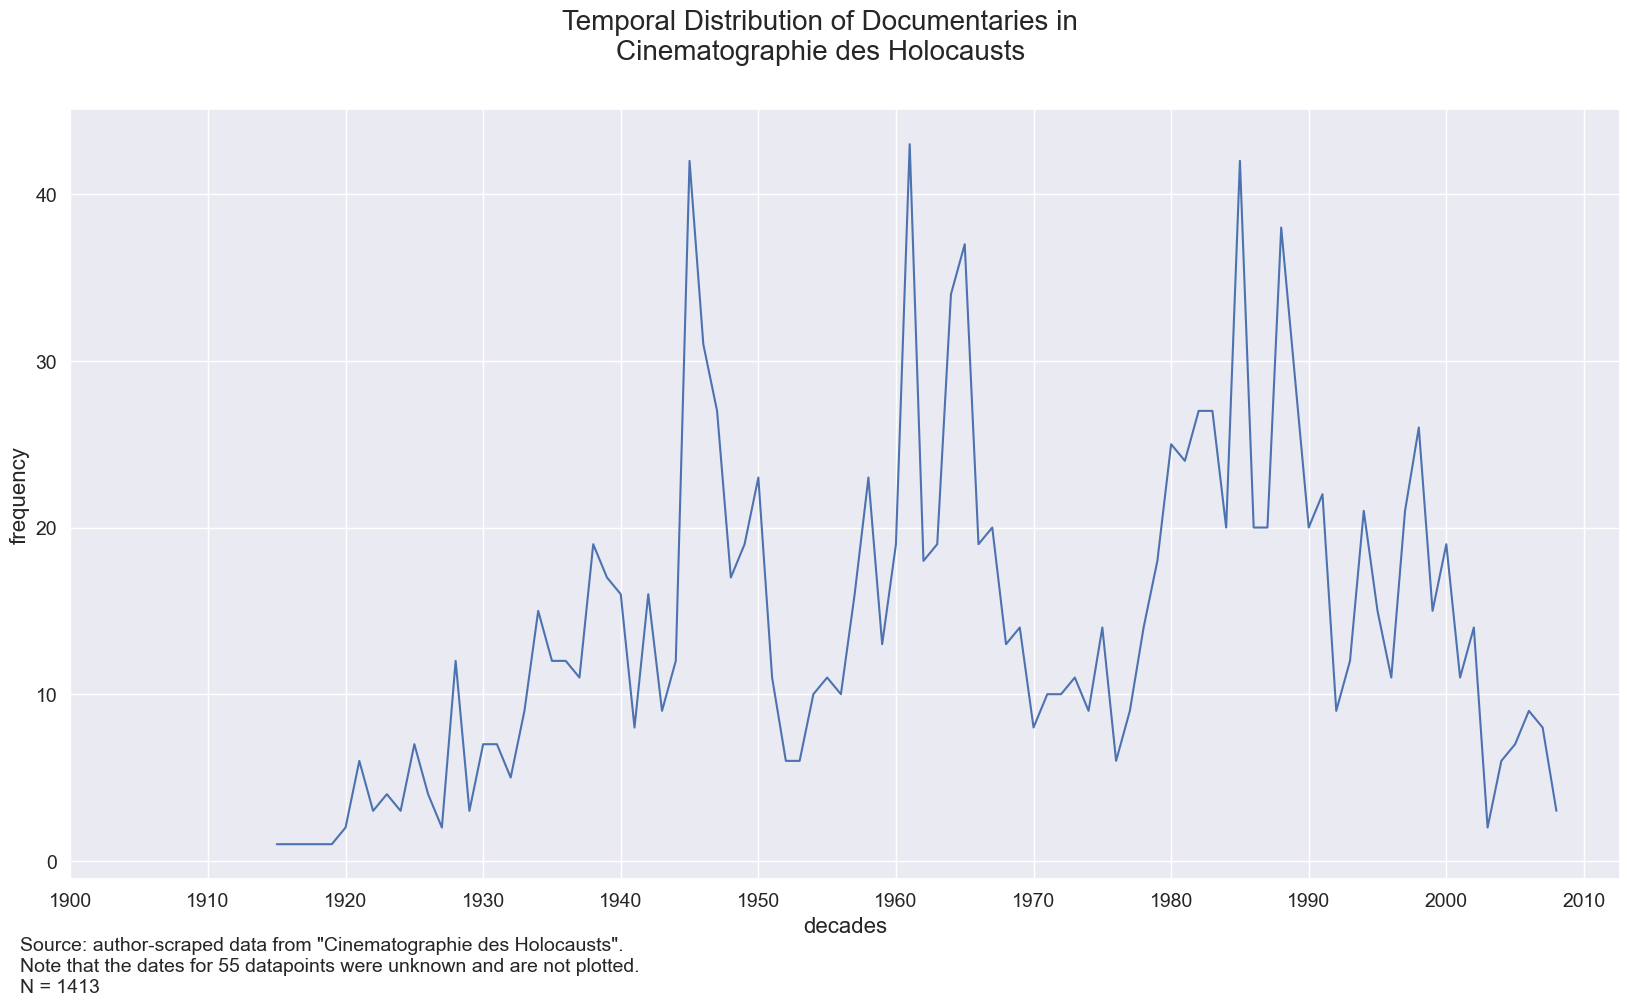

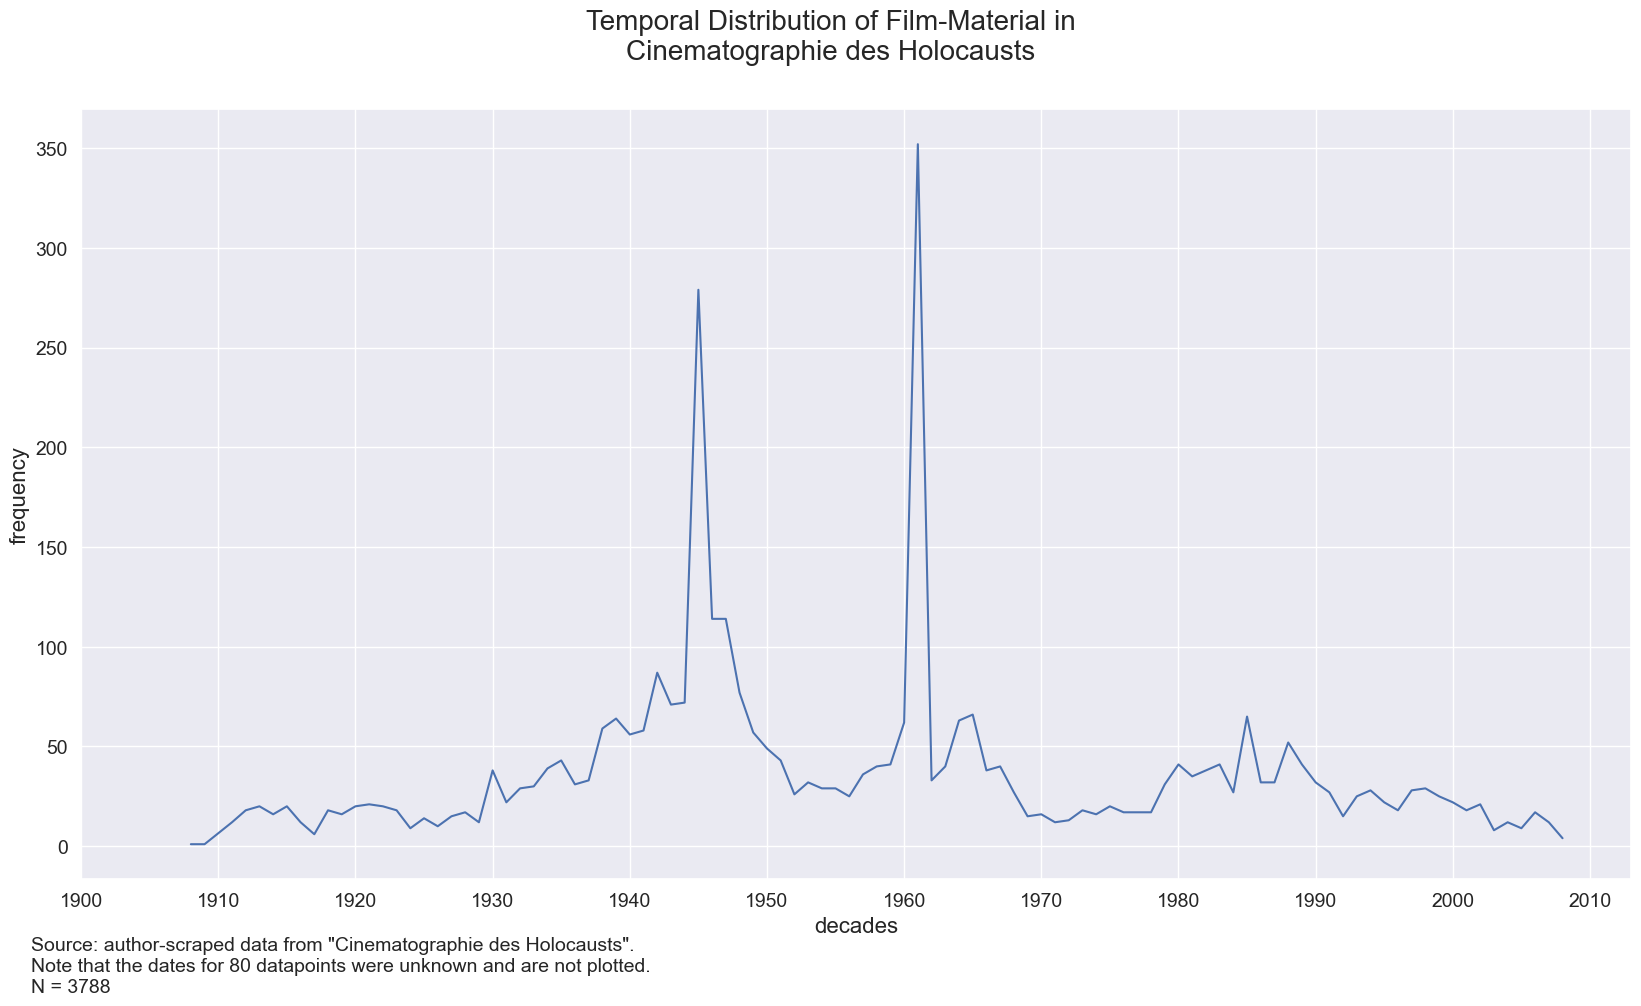

In [4]:
docs = df1.loc[(df1['standardised_genre'] == 'Dokumentarfilm'), : ]
freq_graph(docs, "date", 'Documentaries')

docs = df1.loc[(df1['standardised_genre'] == 'Dokumentarfilm'), : ]
len(docs)

# docs = df1.loc[(df1['standardised_genre'] == 'Dokumentarfilm'), : ]
freq_graph(df1, "date", 'Film-Material')

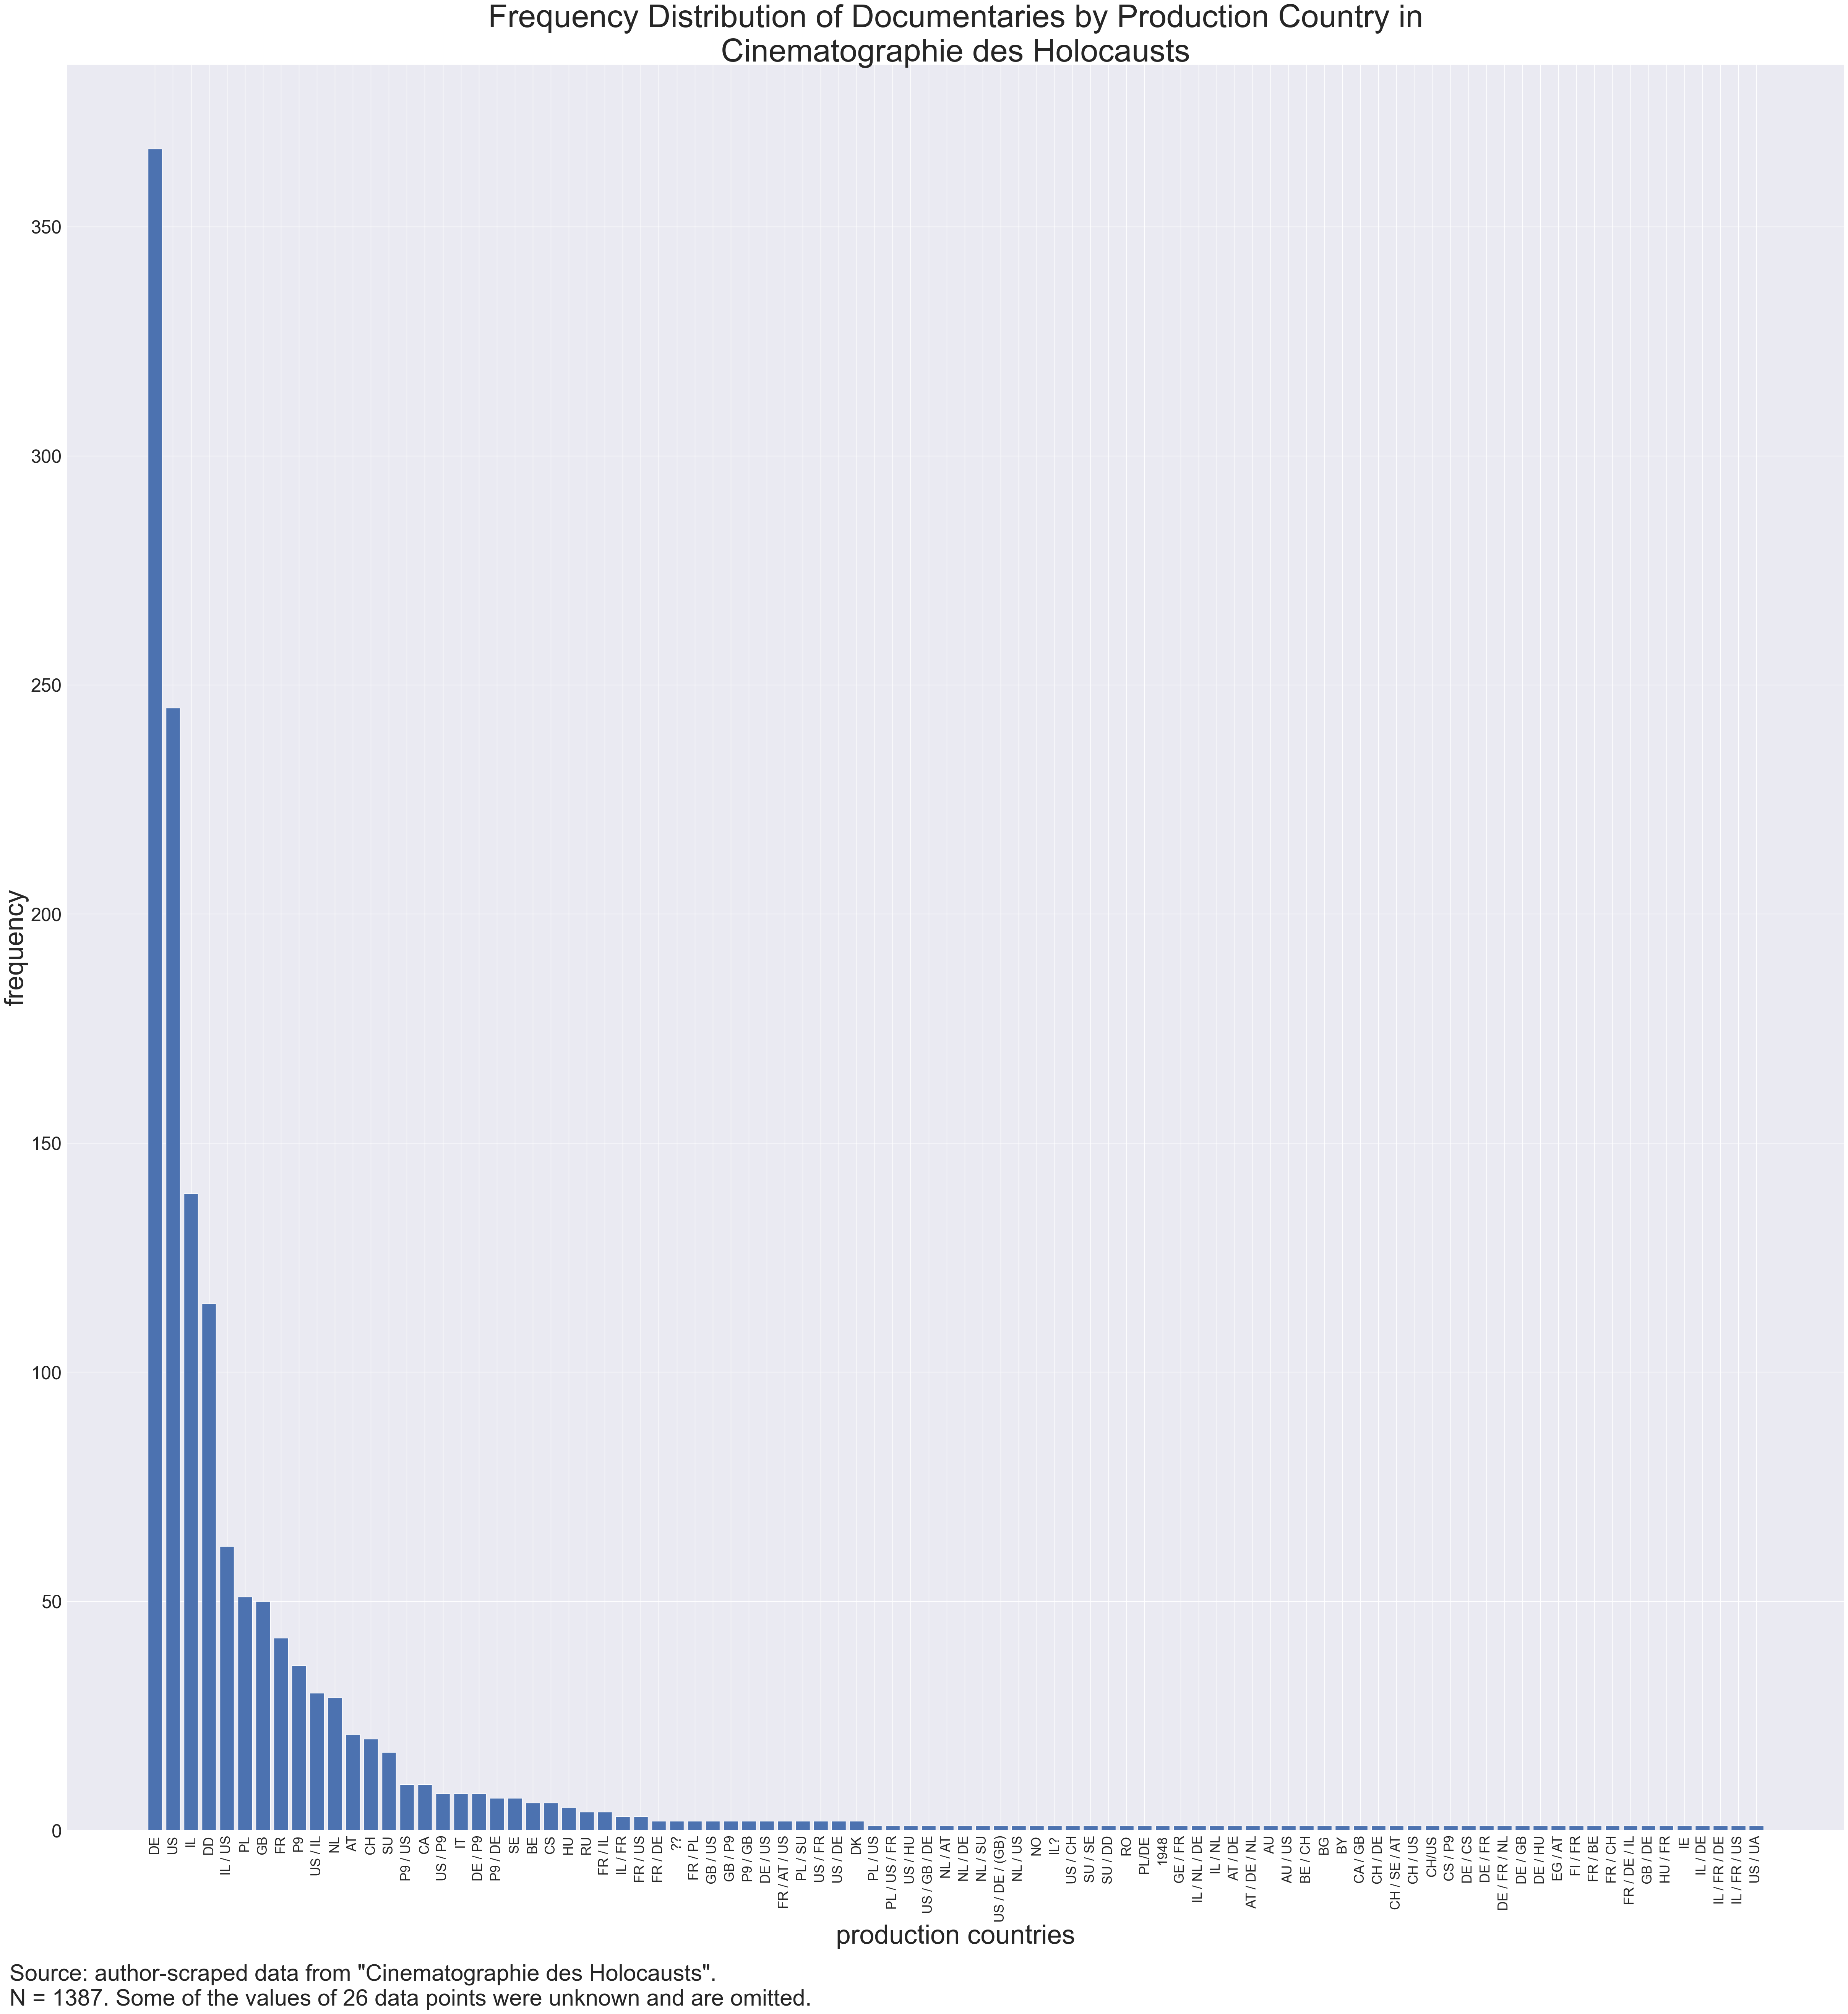

In [21]:
### uncomment for all production materials
# bars = df1.groupby('production_country').size().reset_index(name='counts')
# bars = bars.sort_values('counts', ascending=False)
### uncomment for docs only
docs = df1[(df1.standardised_genre == 'Dokumentarfilm')]
bars = docs.groupby('production_country').size().reset_index(name='counts')
bars = bars.sort_values('counts', ascending=False)


min_count = 0
title_materials = f'Frequency Distribution of Film-Materials by Production Country in\nCinematographie des Holocausts'
title_docs = f'Frequency Distribution of Documentaries by Production Country in\nCinematographie des Holocausts'

y = bars.loc[(bars.counts >= min_count), 'counts']
x = bars.loc[(bars.counts >= min_count), 'production_country']
l = len(bars.production_country.unique()) - len(x)
c = sum(bars.counts) - sum(y)

plt.rcParams["figure.figsize"] = (60,60)
plt.bar(x, y)
plt.title(title_docs, fontsize=60)

if min_count > 0:
    plt.xticks(rotation=30, fontsize=30)
    plt.yticks(fontsize=40)
    plt.ylabel('frequency',fontsize=50)
    plt.xlabel('production countries',fontsize=50)
    plt.figtext(0.1, 0.035, f'Source: author-scraped data from \"Cinematographie des Holocausts\".\nNote that only the {len(x)} countries who produced more than {min_count} films are plotted, thus {l} countries and {c} productions have been omitted.\nN = {sum(y)}', 
                wrap=True, horizontalalignment='left', fontsize=40)
else: 
    plt.xticks(rotation=90, fontsize=25)
    plt.yticks(fontsize=35)
    plt.ylabel('frequency',fontsize=50)
    plt.xlabel('production countries', fontsize=50)
    plt.figtext(0.1, 0.035, f'Source: author-scraped data from \"Cinematographie des Holocausts\".\nN = {sum(y)}. Some of the values of {len(docs)-sum(y)} data points were unknown and are omitted.', 
                wrap=True, horizontalalignment='left', fontsize=43)
plt.show()

In [89]:
res = df1.groupby(['date','standardised_genre']).size().reset_index(name='counts')
zero_drop = len(res.loc[(res['date'] == 0),:])
res = res.loc[(res['date'] > 0),:] 
genre_drop = len(df1.loc[(df1['standardised_genre'] == 'Animationsfilm') |  # 11 animation films are in corpus
                         (df1['standardised_genre'] == 'Werbefilm') | # 8 commercials are in corpus
#                          (res['standardised_genre'] == 'unknown') |\ # 223 films whose genre is unknown are in corpus
                         (df1['standardised_genre'] == 'TV-Show'),:]) # 1 TV-Show is in corpus
res = res.loc[(res['standardised_genre'] != 'Animationsfilm')&\
                         (res['standardised_genre'] != 'Werbefilm')&\
#                          (res['standardised_genre'] != 'unknown')&\
                         (res['standardised_genre'] != 'TV-Show'),:]

print('dropped # data points whose dates were unknown', zero_drop)
print('dropped # data points whose genres were too small for graphing', genre_drop)

dropped # data points whose dates were unknown 5
dropped # data points whose genres were too small for graphing 20


In [90]:
res.standardised_genre.unique()

array(['Spielfilm', 'unknown', 'Dokumentarfilm', 'Archiv', 'Dokudrama',
       'TV-Serie'], dtype=object)

In [72]:
# piv2 = pd.pivot_table(data=res, index=['date'], columns=['standardised_genre'], values='counts')
# piv2

23


C:\Users\hwx756\AppData\Local\Temp\ipykernel_21336\241368632.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticks, size = 40)


Text(0.11, 0.02, 'Source: author-scraped data from "Cinematographie des Holocausts".\nN = 3688. Some of the values of 100 data points were unknown and are omitted.')

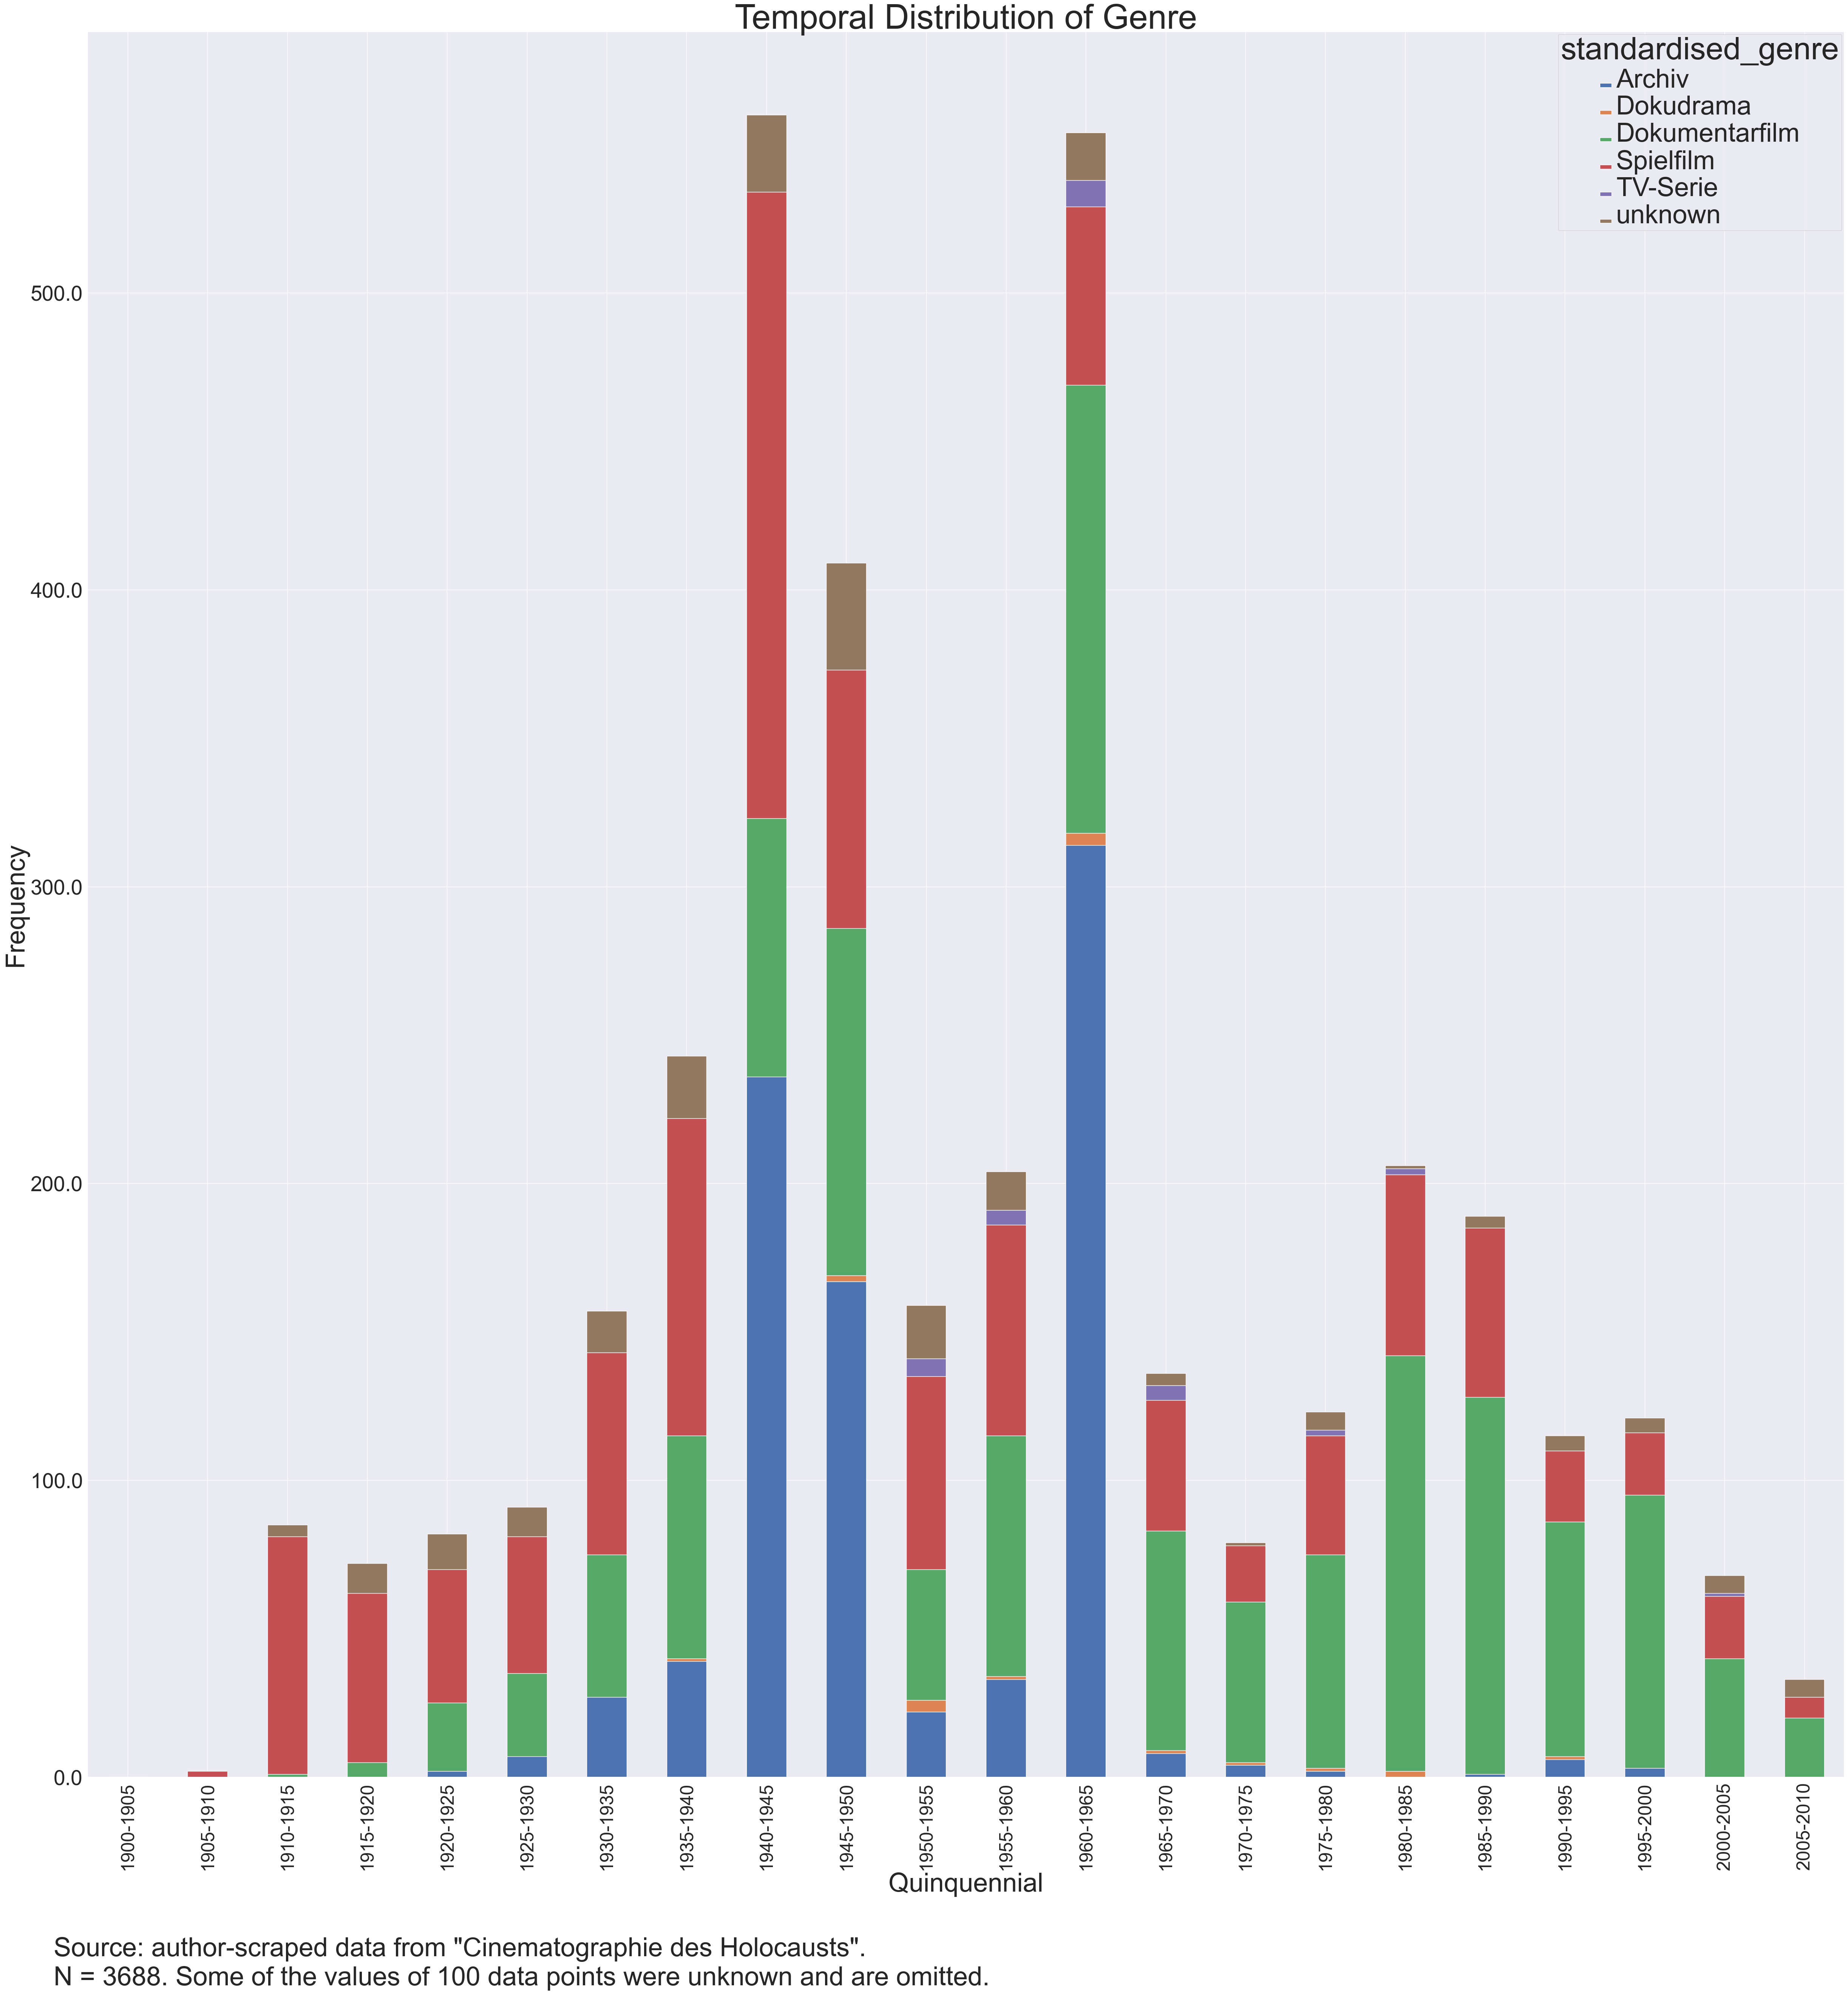

In [91]:
cut_bins = list(range(1900,2015,5))
cut_labels = [str(cut_bins[i]) + '-' + str(cut_bins[i+1]) for i in range(len(cut_bins)-1)]
print(len(cut_bins))
res['bins'] = pd.cut(res['date'], bins=cut_bins, labels=cut_labels)
piv = pd.pivot_table(data=res, index=['bins'], columns=['standardised_genre'], values='counts',aggfunc=np.sum)
y = piv.sum().sum()
omitted = len(df1)-y
ax = piv.plot(kind='bar', stacked=True)


ax.axes.set_title('Temporal Distribution of Genre',fontsize=65)
ax.set_xlabel("Quinquennial",fontsize=50)
ax.set_ylabel("Frequency",fontsize=50)
yticks, ylabels = plt.yticks()
xticks, xlabels = plt.xticks()
plt.setp(ax.get_legend().get_texts(), fontsize='50') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='60') # for legend title
ax.set_yticklabels(yticks, size = 40)
ax.set_xticklabels(xlabels, size = 35)
plt.figtext(0.11, 0.02, f'Source: author-scraped data from \"Cinematographie des Holocausts\".\nN = {y}. Some of the values of {omitted} data points were unknown and are omitted.', #change sum(y)??
                wrap=True, horizontalalignment='left', fontsize=50)

C:\Users\hwx756\AppData\Local\Temp\ipykernel_21336\3715846343.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticks, size = 50)


Text(0.09, 0.06, 'Source: author-scraped data from "Cinematographie des Holocausts".\nN = 3688. Some of the values of 100 data points were unknown and are omitted.')

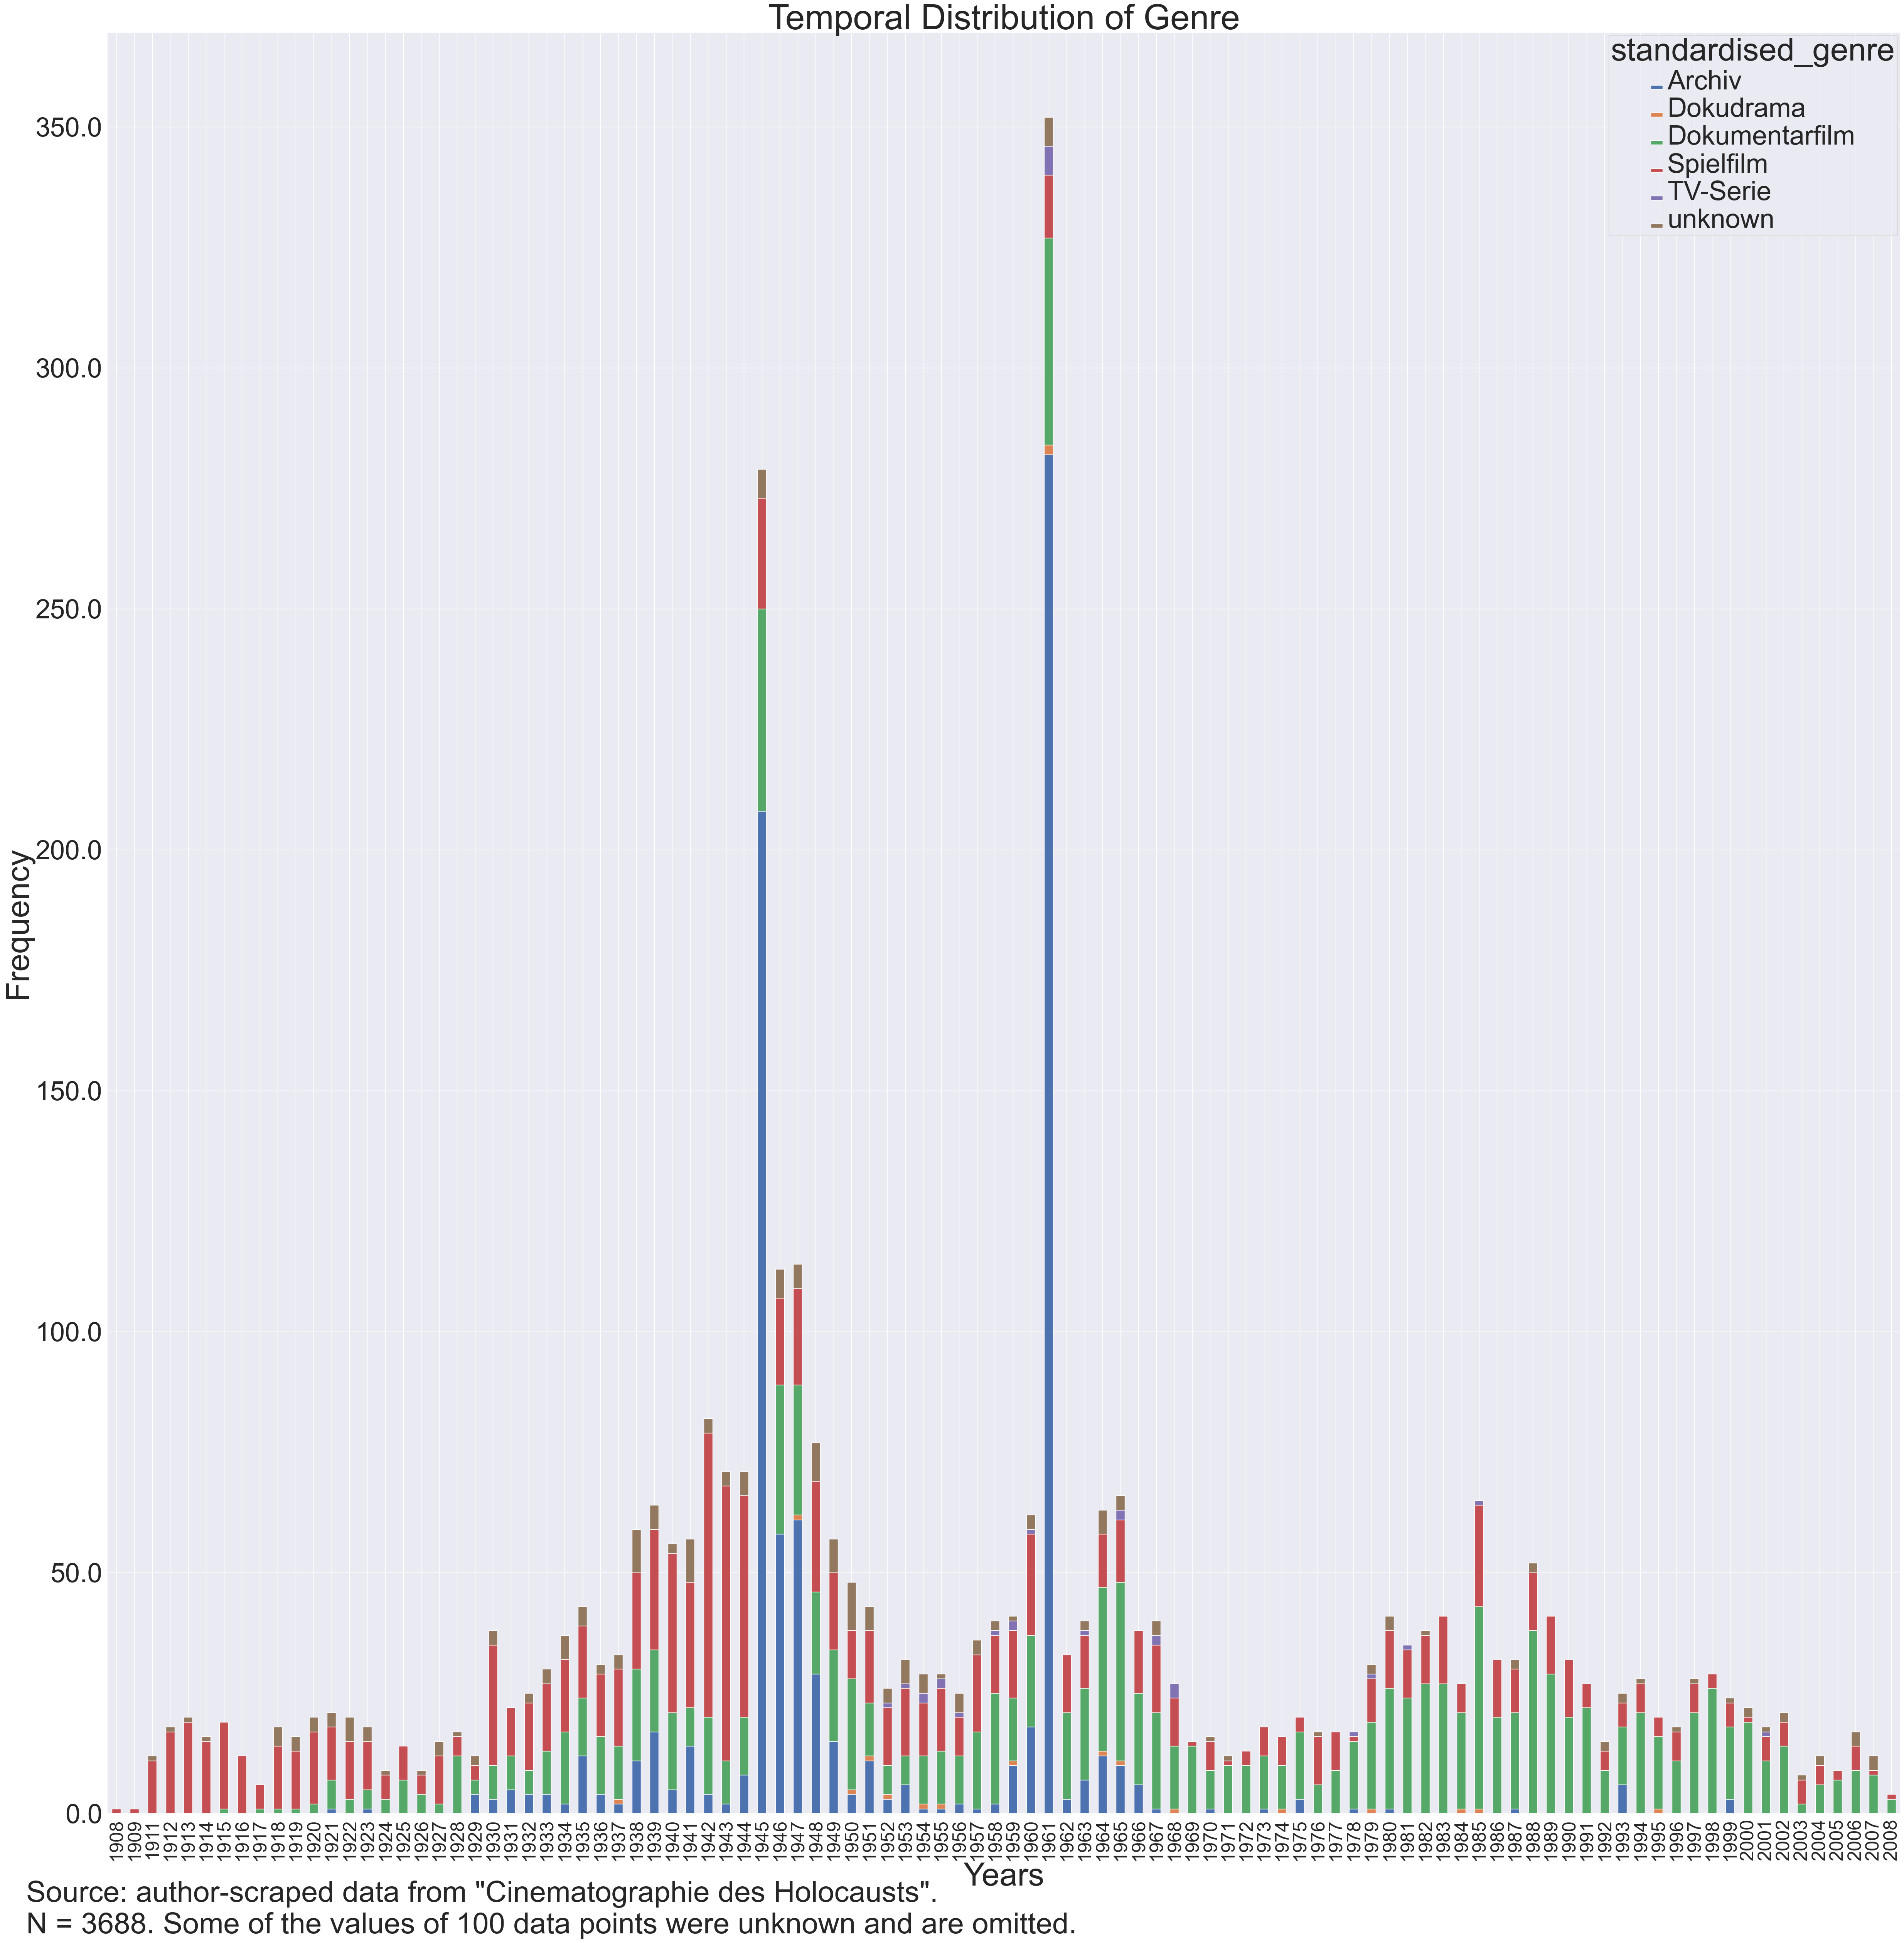

In [92]:
piv = pd.pivot_table(data=res, index=['date'], columns=['standardised_genre'], values='counts',aggfunc=np.sum)
ax = piv.plot(kind='bar', stacked=True)
y = piv.sum().sum()
omitted = len(df1)-y
ax.axes.set_title('Temporal Distribution of Genre',fontsize=65)
ax.set_xlabel("Years",fontsize=60)
ax.set_ylabel("Frequency",fontsize=60)
yticks, ylabels = plt.yticks()
xticks, xlabels = plt.xticks()
plt.setp(ax.get_legend().get_texts(), fontsize='50') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='60') # for legend title
ax.set_yticklabels(yticks, size = 50)
ax.set_xticklabels(xlabels, size = 35)
plt.figtext(0.09, 0.06, f'Source: author-scraped data from \"Cinematographie des Holocausts\".\nN = {int(y)}. Some of the values of {int(omitted)} data points were unknown and are omitted.', 
                wrap=True, horizontalalignment='left', fontsize=55)

In [61]:
piv.sum()

standardised_genre
Archiv             871.0
Dokudrama           18.0
Dokumentarfilm    1358.0
Spielfilm         1193.0
TV-Serie            30.0
dtype: float64

In [63]:
piv.Dokumentarfilm.sum() # why unequal to above with N=1413 ?

1358.0

In [69]:
len(df1[df1.standardised_genre == 'unknown'])

223